In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from  scipy.stats import f
from scipy.stats import t

In [16]:
import statsmodels.api as sm 

# Question 1

In [3]:
import dataloader_p2 as dt_p2

In [4]:
dt_p2.quarterly

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


# Question 2

In [6]:
CPI = dt_p2.quarterly.CPI
year = pd.to_datetime(dt_p2.quarterly.DATE)
n = len(CPI)

In [10]:
inf = []
for i in range(1,n):
    inter = (CPI[i] - CPI[i-1])/CPI[i-1]
    inf.append(inter)

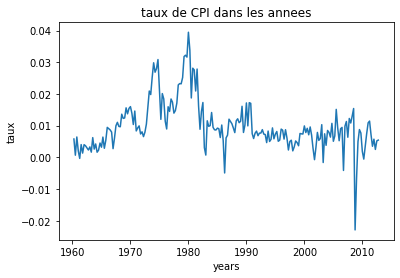

In [11]:
plt.plot(year[1:n],inf)
plt.xlabel('years')
plt.ylabel('taux')
plt.title('taux de CPI dans les annees')
plt.show()

Comment:

We see that the inflation rate is usually positive, except for the significant year 2008, which is the time for the global financial crisis. The inflation rate held comparatively high during 1970s and 1980s, and is comparatively stable in 1960s and 1990s.

# Question 3

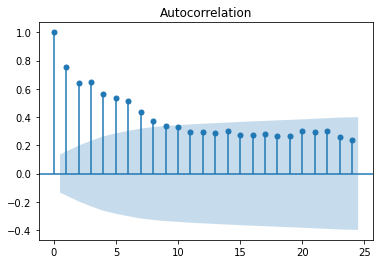

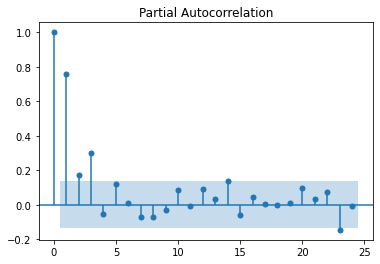

In [52]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(np.array(inf))
plt.show()
plot_pacf(np.array(inf))
plt.show()

Comment:

The autocorrelation graph shows that the autocorrelation diminues with time(delay), while the partial autocorrelation oscillates around 0. And we can deduce from these two figures that the past data pose an influence on the future data in terms of inflation rate.

The autocorrelation presents the influence of a series at time t-x in the past on the value of the series at time t, independent of the rest of the observations. The partial autocorrelation presents the influence of all of all the value in the past until time t-x. Thus, we identify the joint effects of the different years.

# Question 4

The stationarity means that the distribution of data is periodic. The ergodicity means that the limit of a dataset is independent with the starting point of analysis. 

These two conditions are suffisante for applying the ergodicity thereom, which proposes that the time average is equal to the spatial average of one dataset. Thus, a single trajectory makes it possible to analyze the stochastic process.

# Question 5

In [12]:
import statsmodels.tsa.api as smt

In [14]:
minf = smt.AR(inf).fit(maxlag = 4)
print(minf.params)
print(minf.aic)
print(minf.bic)

[ 0.00149584  0.60377471 -0.02700434  0.33513437 -0.06041087]
-10.662277978959965
-10.565677434227636


[ 0.00149584  0.60377471 -0.02700434  0.33513437 -0.06041087] is the coeficient result for different delays

# Question 6

In [15]:
y = dt_p2.quarterly.Unemp[1:]
const = np.ones(np.shape(y))
X = np.column_stack((const,np.array(inf)))

In [17]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.912
Time:                        10:16:59   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

# Question 7

In [18]:
u = results.resid

In [19]:
n = len(u)
u_1 = u[0:n-1]
const = np.ones(n-1)
X = np.column_stack((const,u_1))
X = X[:,1]
y = u[1:n]
model1 = sm.OLS(y,X)
results1= model1.fit()
print(results1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):                   6.88e-144
Time:                        10:19:13   Log-Likelihood:                         -70.409
No. Observations:                 210   AIC:                                      142.8
Df Residuals:                     209   BIC:                                      146.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

p = 0.00 so significant at 1%

# Exercice 8

In [21]:
rho = results1.params[0]

In [22]:
rho

0.9799237799707919

In [26]:
transform_u = np.array(u[1:n])-np.array(rho*u_1)

In [27]:
transform_u

array([ 0.2910574 ,  0.71998209,  0.54080329,  0.21831306, -0.21826742,
       -0.55181671, -0.5716899 , -0.10842407,  0.03009969, -0.04908591,
        0.22750621, -0.04351768, -0.24418532,  0.06409881, -0.11270943,
       -0.27805417, -0.21855721, -0.0551484 , -0.09017195, -0.25867576,
       -0.32270577, -0.30825422, -0.27620617, -0.08384885, -0.10465518,
       -0.11537468,  0.09047356, -0.05037019, -0.08135739,  0.05234925,
       -0.21186393, -0.20715641, -0.09681827, -0.17933592, -0.05422412,
       -0.02909612,  0.08948554, -0.05336504,  0.54840064,  0.5646513 ,
        0.37909726,  0.63482416,  0.10467446, -0.03457728,  0.12522578,
       -0.09707271, -0.16414072, -0.07388472, -0.13988025, -0.21438191,
       -0.46249157, -0.03189343, -0.1518033 , -0.06476624,  0.32575363,
        0.05489685,  0.40982884,  0.95573414,  1.69470617,  0.65840256,
       -0.35711698, -0.11979314, -0.51465515, -0.12315006,  0.17865611,
        0.07514255, -0.24258836, -0.3402912 , -0.2037997 , -0.21

# Exercice 9

In [40]:
n = len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[1:int((n/2))]
const = np.ones(np.shape(y))
X = np.column_stack((const,np.array(inf[:int((n/2))-1])))

In [41]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.402
Time:                        10:43:17   Log-Likelihood:                -204.20
No. Observations:                 105   AIC:                             412.4
Df Residuals:                     103   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9377      0.287     20.662      0.0

In [42]:
n = len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[int(n/2):]
const = np.ones(np.shape(y))
X = np.column_stack((const,np.array(inf[int(n/2)-1:])))

In [43]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.315
Date:                Thu, 18 Nov 2021   Prob (F-statistic):             0.0715
Time:                        10:44:10   Log-Likelihood:                -193.35
No. Observations:                 106   AIC:                             390.7
Df Residuals:                     104   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4269      0.259     24.822      0.0

The difference of the coefficient before and after the middle point of time is quite large. Before: 15.6 After:-54.4

# Exercice 10

这里不知道题意有没有理解对：删除inflation当前项，而添加inflation的一二三四阶延迟项 此外添加chomage自身的一二三四阶延迟项

In [44]:
n =len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[5:n]
const = np.ones(np.shape(y))
inf_1 = inf[3:n-2]
inf_2 = inf[2:n-3]
inf_3 = inf[1:n-4]
inf_4 = inf[0:n-5]
cho_1 = dt_p2.quarterly.Unemp[4:n-1]
cho_2 = dt_p2.quarterly.Unemp[3:n-2]
cho_3 = dt_p2.quarterly.Unemp[2:n-3]
cho_4 = dt_p2.quarterly.Unemp[1:n-4]

X = np.column_stack((const,np.array(inf_1),np.array(inf_2),np.array(inf_3),np.array(inf_4),cho_1,cho_2,cho_3,cho_4))

In [29]:
len(dt_p2.quarterly.Unemp)

212

In [30]:
len(inf)

211

In [45]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          2.80e-161
Time:                        10:57:30   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

In [46]:
n,k = np.shape(X)
u = results.resid
SSR10_0 = u.T@u

In [47]:
n =len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[5:n]
const = np.ones(np.shape(y))

cho_1 = dt_p2.quarterly.Unemp[4:n-1]
cho_2 = dt_p2.quarterly.Unemp[3:n-2]
cho_3 = dt_p2.quarterly.Unemp[2:n-3]
cho_4 = dt_p2.quarterly.Unemp[1:n-4]

X = np.column_stack((const,cho_1,cho_2,cho_3,cho_4))

In [48]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     2165.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          1.36e-164
Time:                        11:09:35   Log-Likelihood:                -2.9991
No. Observations:                 207   AIC:                             16.00
Df Residuals:                     202   BIC:                             32.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2157      0.071      3.036      0.0

In [49]:
u = results.resid
SSR10_1 = u.T@u

In [50]:
SSR10_1

12.476148169307269

In [51]:
SSR10_0

11.587384278415236

In [56]:
F=((SSR10_1-SSR10_0)/4)/(SSR10_0/(n-k)) 
f.sf(F,4,n-k)

0.004547527213252396

Thus the non-causality of the inflatio on the chomage is verified in the 1% level.

# Exercice 11

In [57]:
n =len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[5:n]
const = np.ones(np.shape(y))
inf_1 = inf[3:n-2]
inf_2 = inf[2:n-3]
inf_3 = inf[1:n-4]
inf_4 = inf[0:n-5]
cho_1 = dt_p2.quarterly.Unemp[4:n-1]
cho_2 = dt_p2.quarterly.Unemp[3:n-2]
cho_3 = dt_p2.quarterly.Unemp[2:n-3]
cho_4 = dt_p2.quarterly.Unemp[1:n-4]
X = np.column_stack((const,np.array(inf_1),np.array(inf_2),np.array(inf_3),np.array(inf_4),cho_1,cho_2,cho_3,cho_4))

In [58]:
model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          2.80e-161
Time:                        11:13:51   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

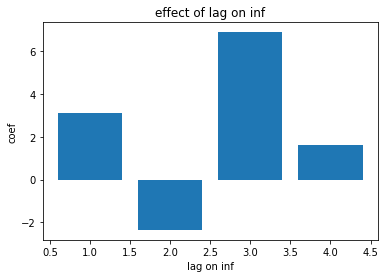

In [62]:
d_inf = (results.params[1],results.params[2],results.params[3],results.params[4])
x = (1,2,3,4)
plt.bar(x,d_inf)
plt.title('effect of lag on inf')
plt.xlabel('lag on inf')
plt.ylabel('coef')
plt.show()

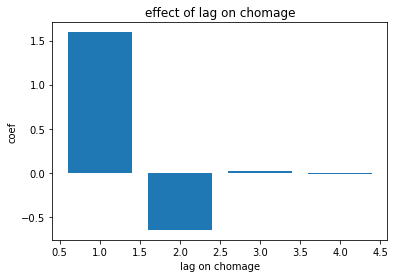

In [63]:
d_cho = (results.params[5],results.params[6],results.params[7],results.params[8])
x = (1,2,3,4)
plt.bar(x,d_cho)
plt.title('effect of lag on chomage')
plt.xlabel('lag on chomage')
plt.ylabel('coef')
plt.show()

In [64]:
n =len(dt_p2.quarterly.Unemp)
y = dt_p2.quarterly.Unemp[7:n]
const = np.ones(np.shape(y))
inf_1 = inf[5:n-2]
inf_2 = inf[4:n-3]
inf_3 = inf[3:n-4]
inf_4 = inf[2:n-5]
inf_5 = inf[1:n-6]
inf_6 = inf[0:n-7]
X = np.column_stack((const,np.array(inf_1),np.array(inf_2),np.array(inf_3),np.array(inf_4),np.array(inf_5),np.array(inf_6)))

In [65]:
odel=sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1145.
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          2.80e-161
Time:                        11:22:34   Log-Likelihood:                 4.6497
No. Observations:                 207   AIC:                             8.701
Df Residuals:                     198   BIC:                             38.70
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.072      2.014      0.0

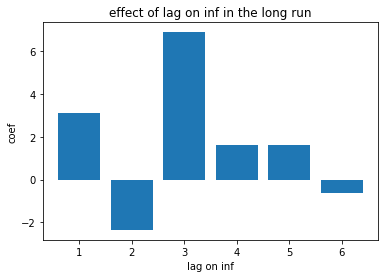

In [66]:
d_inf = (results.params[1],results.params[2],results.params[3],results.params[4],results.params[5],results.params[6])
x = (1,2,3,4,5,6)
plt.bar(x,d_inf)
plt.title('effect of lag on inf in the long run')
plt.xlabel('lag on inf')
plt.ylabel('coef')
plt.show()